<a href="https://colab.research.google.com/github/TungSoPon/bsc_dpdm22/blob/main/Project_Datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns

# นำข้อมูลเข้า


In [ ]:
data_zoo = pd.read_csv('/content/drive/MyDrive/Project/zoo.csv')
data_zoo

In [4]:
data_class = pd.read_csv('/content/drive/MyDrive/Project/class.csv')
data_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


# เช็ค Missing 


In [5]:
data_zoo.isnull().any()

animal_name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
class_type     False
dtype: bool

# แบ่งข้อมูล

In [6]:
from sklearn.model_selection import train_test_split
# Load the dataset
zoo_data = data_zoo

# Separate features and labels
X = zoo_data.drop(['animal_name', 'class_type'], axis=1)
y = zoo_data['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  DecisionTree

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# สร้างตัวแยกประเภทของต้นไม้การตัดสินใจ
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# คาดการณ์ชุดการทดสอบและคำนวณความแม่นยำ
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# ส่งออกแผนผังการตัดสินใจเป็นไฟล์จุด
export_graphviz(clf, out_file='tree.dot', feature_names=X.columns, class_names=['1', '2', '3', '4', '5', '6', '7'])

# เห็นภาพแผนผังการตัดสินใจโดยใช้กราฟวิซ
with open('tree.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render('tree')

Accuracy: 0.9523809523809523


'tree.pdf'

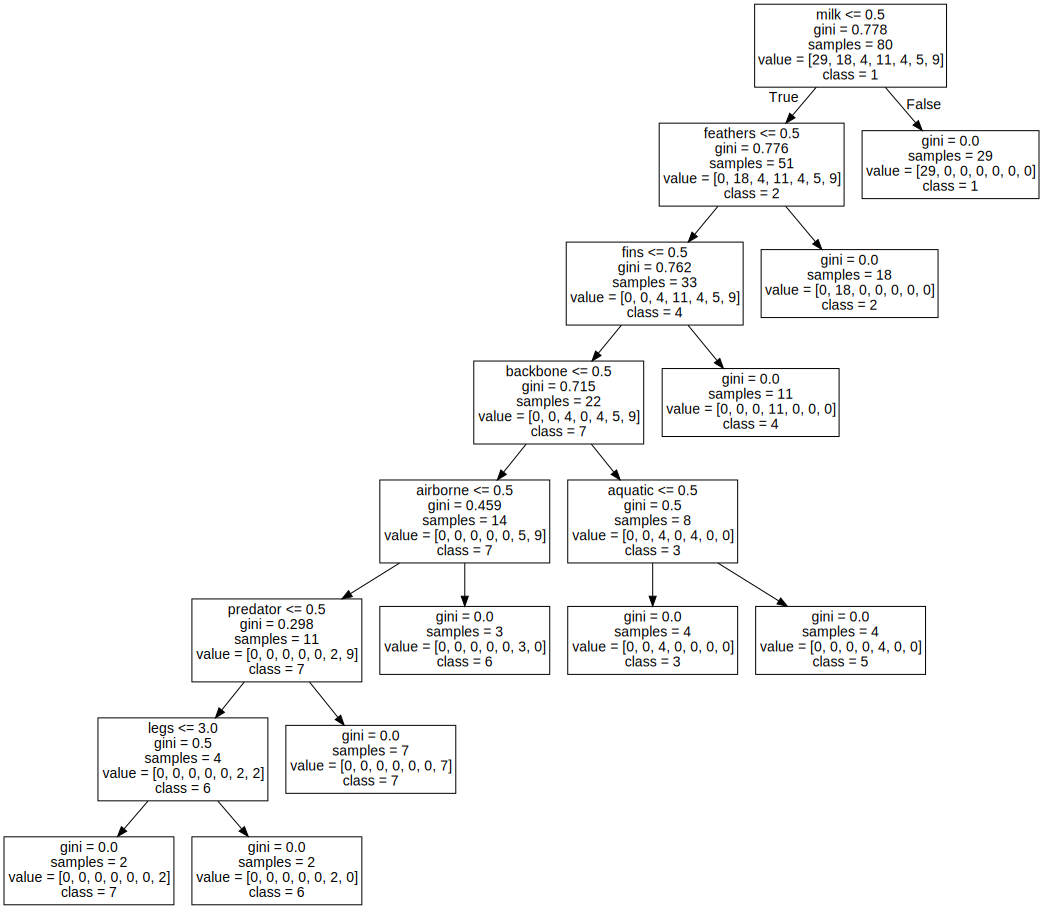

In [8]:
graph

Decision Tree คือวิธีการจัดการข้อมูลเชิงตัวเลขหรือแบบอนุพันธ์ โดยการแบ่งข้อมูลออกเป็นกลุ่มโดยใช้กฎเงื่อนไขหรือเหตุการณ์ที่เกิดขึ้นภายในข้อมูลเป็นแบบ Tree ที่แตกต่างกันไปตามความสำคัญของแต่ละกฎหรือเหตุการณ์ในการแบ่งข้อมูล

สำหรับชุดข้อมูล Zoo Animal Classification จะสามารถสร้าง Decision Tree เพื่อใช้ในการแบ่งข้อมูลและทำนายประเภทของสัตว์ได้ โดยมีขั้นตอนดังนี้

ตรวจสอบข้อมูลและสร้างตารางคำนวณเพื่อบันทึกค่า entropy และ information gain ของแต่ละคุณสมบัติ (feature) ที่ใช้ในการแบ่งข้อมูล โดย entropy จะบอกถึงความสับสนในข้อมูล และ information gain จะบอกถึงความสำคัญของ feature ในการแบ่งข้อมูล

เลือก feature ที่มี information gain สูงสุดเพื่อใช้ในการแบ่งข้อมูล และแบ่งข้อมูลออกเป็นกลุ่มโดยใช้ค่า threshold ของ feature นั้นๆ ในการแบ่ง

ทำซ้ำขั้นตอนที่ 1-2 บนแต่ละกลุ่มย่อย (subgroup) จนกว่าจะได้ Leaf node ซึ่งแทนประเภทของสัตว์

จัดเก็บ Decision Tree ที่ได้จากขั้นตอน 1-3 เพื่อนำไปใช้ในการทำนายประเภทของสัตว์จากข้อมูลใหม่

เมื่อได้ Decision Tree จากข้อมูล Zoo Animal Classification แล้ว สามารถนำไปใช้ในการทำนายประเภทของสัตว์จากข้อมูลใหม่ได้โดยการส่งค่าของคุ

# KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.model_selection import cross_val_score
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean Cross-Validation Score: K1weighted 0.975
Mean Cross-Validation Score: K3weighted 0.95
Mean Cross-Validation Score: K5weighted 0.9
Mean Cross-Validation Score: K1NOweighted 0.975


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Mean Cross-Validation Score: K3NOweighted 0.925
Mean Cross-Validation Score: KNOweighted 0.8375


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [11]:
knn_distance1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn_distance1.fit(X_train,y_train)

yknn_pred1 = knn_distance1.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracykkn1 = accuracy_score(y_test, yknn_pred1)

# Print the accuracy score
print("แสดงว่า Model KNN นี้มีแสดงประสิทธิภาพในการจำแนกประเภทของสัตว์เท่ากับ", accuracykkn1 )

แสดงว่า Model KNN นี้มีแสดงประสิทธิภาพในการจำแนกประเภทของสัตว์เท่ากับ 1.0


# Naive_bayes

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create the Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = nb.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9523809523809523


#สรุปจากการคำนวณความแม่นยำของโมเดล
1.  Model DecisionTree 
   * ได้ค่า Accuracy เท่ากับ 0.9523809523809523

2. KNeighbors
   * Model ที่ดีที่สุดคือ K=1, no weighted ซึ่งมีค่า Mean Cross-Validation Score เท่ากับ 0.975
   * ได้ค่า Accuracy เท่ากับ 0.9047619047619048

3. NaiveBayes
   * ได่ค่า Accuracy เท่ากับ 0.9523809523809523

#จึงสรุปว่า
สามารถเลือกใช้โมเดล  DecisionTree หรือ NaiveBayes ได้ทั้งสองโมเดลเนื่องจากมีค่า Accuracy เท่ากัน


# Association rules ของแต่ละลักษณะ โดยมีทั้งหมด 7 ลักษณะ

#เตรียมข้อมูลทำแต่ละประเภท

In [14]:
As = pd.merge(data_zoo, data_class, how='left', left_on='class_type', right_on='Class_Number')
As.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [15]:
dataas = As.drop(['Class_Number','Number_Of_Animal_Species_In_Class','class_type','Animal_Names'],axis=1)
dataas

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


In [16]:
hair_map = {0: 'hairless', 1: 'hairy'}
feathers_map = {0: 'Nofeathers', 1: 'feathered'}
eggs_map = {0: 'Viviparous', 1: 'egg'}
milk_map = {0: 'not milk', 1: 'breastfeeding'}
airborne_map = {0: 'No fly', 1: 'can fly'}
aquatic_map = {0: 'No water', 1: 'in the water'}
predator_map = {0: 'No meat', 1: 'eat meat'}
toothed_map = {0: 'No toothed', 1: 'toothed'}
backbone_map = {0: 'No spine', 1: 'spine'}
breathes_map = {0: 'No breathes', 1: 'breathes'}
venomous_map = {0: 'Poisonous', 1: 'Poisonous'}
fins_map = {0: 'No fins', 1: 'have fins'}
legs_map = {0: '0legs', 2: '2legs', 4: '4legs', 5: '5legs', 6: '6legs'}
tail_map = {0: 'No tail', 1: 'with a tail'}
domestic_map = {0: 'No domestic', 1: 'have domestic'}
catsize_map = {0: 'No catsize', 1: 'catsize'}

In [17]:
dataas['hair'] = dataas['hair'].map(hair_map)
dataas['feathers'] = dataas['feathers'].map(feathers_map)
dataas['eggs'] = dataas['eggs'].map(eggs_map)
dataas['milk'] = dataas['milk'].map(milk_map)
dataas['airborne'] = dataas['airborne'].map(airborne_map)
dataas['aquatic'] = dataas['aquatic'].map(aquatic_map)
dataas['predator'] = dataas['predator'].map(predator_map)
dataas['toothed'] = dataas['toothed'].map(toothed_map)
dataas['backbone'] = dataas['backbone'].map(backbone_map)
dataas['breathes'] = dataas['breathes'].map(breathes_map)
dataas['venomous'] = dataas['venomous'].map(venomous_map)
dataas['fins'] = dataas['fins'].map(fins_map)
dataas['legs'] = dataas['legs'].map(legs_map)
dataas['tail'] = dataas['tail'].map(tail_map)
dataas['domestic'] = dataas['domestic'].map(domestic_map)
dataas['catsize'] = dataas['catsize'].map(catsize_map)

In [18]:
dataas

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
0,aardvark,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,catsize,Mammal
1,antelope,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,No meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal
2,bass,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,No domestic,No catsize,Fish
3,bear,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,catsize,Mammal
4,boar,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,No meat,toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,No domestic,catsize,Mammal
97,wasp,hairy,Nofeathers,egg,not milk,can fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Bug
98,wolf,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal
99,worm,hairless,Nofeathers,egg,not milk,No fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,0legs,No tail,No domestic,No catsize,Invertebrate


# 1.Association ของสัตว์ประเภท Mammal(เลี้ยงลูกด้วยนม)

In [19]:
!pip install apyori
import numpy as np
import matplotlib.pyplot as plt
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=9ce2286c4f5aa876314423b31c704807f718b3d30e1be91d57958fb11e593587
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [20]:
Class_Mammal = dataas[dataas['Class_Type']=='Mammal']
Class_Mammal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
0,aardvark,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,catsize,Mammal
1,antelope,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,No meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal
3,bear,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,catsize,Mammal
4,boar,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal
5,buffalo,hairy,Nofeathers,Viviparous,breastfeeding,No fly,No water,No meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Mammal


In [21]:
Transacs_Class_Mammal = []
for i in range(0,len(Class_Mammal)):
            Transacs_Class_Mammal.append([str(Class_Mammal.values[i,j]) for j in range(1,16)])
            Transacs_Class_Mammal

In [22]:
Asso_Class_Mammal = list(apriori(Transacs_Class_Mammal,min_support = 0.98, min_confidence = 0.9))

In [23]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Mammal4 =list()
for record in Asso_Class_Mammal:
    if len(record.items) == 4:
      Asso_Class_Mammal4.append(record)

## สรุปผลสัตว์ประเภท Mammal (เลี้ยงลูกด้วยนม)

*   ถ้ามีกระดูกสันหลัง มีโอกาส 97.56% ที่จะมีฟัน มีน้ำนม มีหาง
*   ถ้ามีกระดูกสันหลัง ฟัน และนม มีโอกาส 100% ที่จะมีหาง
*  lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน




# 2.Association ของสัตว์ประเภท Fish(ปลา)

In [24]:
Class_Fish = dataas[dataas['Class_Type']=='Fish']
Class_Fish.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
2,bass,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,No domestic,No catsize,Fish
7,carp,hairless,Nofeathers,egg,not milk,No fly,in the water,No meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,have domestic,No catsize,Fish
8,catfish,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,No domestic,No catsize,Fish
12,chub,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,No domestic,No catsize,Fish
18,dogfish,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,have fins,0legs,with a tail,No domestic,catsize,Fish


In [25]:
Transacs_Class_Fish = []
for i in range(0,len(Class_Fish)):
            Transacs_Class_Fish.append([str(Class_Fish.values[i,j]) for j in range(1,16)])
            Transacs_Class_Fish

In [26]:
Asso_Class_Fish = list(apriori(Transacs_Class_Fish,min_support = 0.95, min_confidence = 0.9))

In [27]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Fish4 =list()
for record in Asso_Class_Fish:
    if len(record.items) == 4:
      Asso_Class_Fish4.append(record)

## สรุปผลสัตว์ประเภท Fish (ปลา)
* ถ้ามีครีบ มีโอกาสที่ 100% จะไม่มีปีก
* ถ้าอาศัยอยู่ในน้ำและมีครีบ โอกาส 100% ที่จะมีไข่
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน


#3.Association ของสัตว์ประเภท Bird(นก)

In [28]:
Class_Bird = dataas[dataas['Class_Type']=='Bird']
Class_Bird.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
11,chicken,hairless,feathered,egg,not milk,can fly,No water,No meat,No toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,have domestic,No catsize,Bird
16,crow,hairless,feathered,egg,not milk,can fly,No water,eat meat,No toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,No domestic,No catsize,Bird
20,dove,hairless,feathered,egg,not milk,can fly,No water,No meat,No toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,have domestic,No catsize,Bird
21,duck,hairless,feathered,egg,not milk,can fly,in the water,No meat,No toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,No domestic,No catsize,Bird
23,flamingo,hairless,feathered,egg,not milk,can fly,No water,No meat,No toothed,spine,breathes,Poisonous,No fins,2legs,with a tail,No domestic,catsize,Bird


In [29]:
Transacs_Class_Bird = []
for i in range(0,len(Class_Bird)):
            Transacs_Class_Bird.append([str(Class_Bird.values[i,j]) for j in range(1,16)])
            Transacs_Class_Bird

In [30]:
Asso_Class_Bird = list(apriori(Transacs_Class_Bird,min_support = 0.95, min_confidence = 0.9))

In [31]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Bird4 =list()
for record in Asso_Class_Bird:
    if len(record.items) == 4:
      Asso_Class_Bird4.append(record)

## สรุปผลสัตว์ประเภท Bird (นก)
* ถ้ามี 2 ขา และมีขน จะมีโอกาสอยู่ 100% ที่จะหายใจทางจมูก และไม่มีฟัน 
* ถ้ามีไข่ แต่ไม่มีครีบและไม่มีนม มีโอกาสอยู่ 100% ที่จะมีกระดูกสันหลัง และมีขน 
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน



# 4.Association ของสัตว์ประเภท Reptile(สัตว์เลื้อยคลาน)

In [32]:
Class_Reptile = dataas[dataas['Class_Type']=='Reptile']
Class_Reptile.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
62,pitviper,hairless,Nofeathers,egg,not milk,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,0legs,with a tail,No domestic,No catsize,Reptile
76,seasnake,hairless,Nofeathers,Viviparous,not milk,No fly,in the water,eat meat,toothed,spine,No breathes,Poisonous,No fins,0legs,with a tail,No domestic,No catsize,Reptile
80,slowworm,hairless,Nofeathers,egg,not milk,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,0legs,with a tail,No domestic,No catsize,Reptile
90,tortoise,hairless,Nofeathers,egg,not milk,No fly,No water,No meat,No toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,catsize,Reptile
91,tuatara,hairless,Nofeathers,egg,not milk,No fly,No water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,No catsize,Reptile


In [33]:
Transacs_Class_Reptile = []
for i in range(0,len(Class_Reptile)):
            Transacs_Class_Reptile.append([str(Class_Reptile.values[i,j]) for j in range(1,16)])
            Transacs_Class_Reptile

In [34]:
Asso_Class_Reptile = list(apriori(Transacs_Class_Reptile,min_support = 0.95, min_confidence = 0.9))

In [35]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Reptile4 =list()
for record in Asso_Class_Reptile:
    if len(record.items) == 4:
      Asso_Class_Reptile4.append(record)

## สรุปผลสัตว์ประเภท Reptile (สัตว์เลื้อยคลาน)
* ถ้ามีหาง มีโอกาสอยู่ 100% ที่จะไม่มีปีก 
* ถ้าไม่มีนม ไม่มีปีก และไม่มีขน มีโอกาสอยู่ 100% ที่จะมีกระดูกสันหลัง 
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน

# 5.Association ของสัตว์ประเภท Amphibian(สัตว์สะเทินน้ำสะเทินบก)

In [36]:
Class_Amphibian = dataas[dataas['Class_Type']=='Amphibian']
Class_Amphibian.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
25,frog,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,No catsize,Amphibian
26,frog,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,No catsize,Amphibian
52,newt,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,toothed,spine,breathes,Poisonous,No fins,4legs,with a tail,No domestic,No catsize,Amphibian
89,toad,hairless,Nofeathers,egg,not milk,No fly,in the water,No meat,toothed,spine,breathes,Poisonous,No fins,4legs,No tail,No domestic,No catsize,Amphibian


In [37]:
Transacs_Class_Amphibian = []
for i in range(0,len(Class_Amphibian)):
            Transacs_Class_Amphibian.append([str(Class_Amphibian.values[i,j]) for j in range(1,16)])
            Transacs_Class_Amphibian

In [38]:
Asso_Class_Amphibian = list(apriori(Transacs_Class_Amphibian,min_support = 0.95, min_confidence = 0.9))

In [39]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Amphibian4 =list()
for record in Asso_Class_Amphibian:
    if len(record.items) == 4:
      Asso_Class_Amphibian4.append(record)

## สรุปผลสัตว์ประเภท Amphibian(สัตว์สะเทินน้ำสะเทินบก)
* ถ้ามีหาง มีกระดูกสันหลัง มีโอกาสอยู่ 100% ที่จะไม่มีปีก 
* ถ้ามีฟัน มีหาง และอยู่ในน้ำ มีโอกาสอยู่ 100% ที่จะไม่มีขน 
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน

# 6.Association ของสัตว์ประเภท Bug(แมลง)

In [40]:
Class_Bug  = dataas[dataas['Class_Type']=='Bug']
Class_Bug .head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
24,flea,hairless,Nofeathers,egg,not milk,No fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Bug
30,gnat,hairless,Nofeathers,egg,not milk,can fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Bug
39,honeybee,hairy,Nofeathers,egg,not milk,can fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,have domestic,No catsize,Bug
40,housefly,hairy,Nofeathers,egg,not milk,can fly,No water,No meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Bug
42,ladybird,hairless,Nofeathers,egg,not milk,can fly,No water,eat meat,No toothed,No spine,breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Bug


In [41]:
Transacs_Class_Bug = []
for i in range(0,len(Class_Bug)):
            Transacs_Class_Bug.append([str(Class_Bug.values[i,j]) for j in range(1,16)])
            Transacs_Class_Bug

In [42]:
Asso_Class_Bug = list(apriori(Transacs_Class_Bug,min_support = 0.95, min_confidence = 0.9))

In [43]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Bug4 =list()
for record in Asso_Class_Bug:
    if len(record.items) == 4:
      Asso_Class_Bug4.append(record)

## สรุปผลสัตว์ประเภท Bug(แมลง)
* ถ้ามีการหายใจทางจมูก มี 6 ขา มีไข่ มีโอกาสอยู่ 100% ที่จะไม่ใบหู 
* ถ้ามีหาง มี 6 ขา และไม่มีนม มีโอกาส อยู่ 100% ที่จะไม่มีครีบ
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน

# 7.Association ของสัตว์ประเภท Invertebrate(สัตว์ไม่มีกระดูกสันหลัง)

In [44]:
Class_Invertebrate  = dataas[dataas['Class_Type']=='Invertebrate']
Class_Invertebrate.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Type
13,clam,hairless,Nofeathers,egg,not milk,No fly,No water,eat meat,No toothed,No spine,No breathes,Poisonous,No fins,0legs,No tail,No domestic,No catsize,Invertebrate
14,crab,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,No toothed,No spine,No breathes,Poisonous,No fins,4legs,No tail,No domestic,No catsize,Invertebrate
15,crayfish,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,No toothed,No spine,No breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Invertebrate
46,lobster,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,No toothed,No spine,No breathes,Poisonous,No fins,6legs,No tail,No domestic,No catsize,Invertebrate
53,octopus,hairless,Nofeathers,egg,not milk,No fly,in the water,eat meat,No toothed,No spine,No breathes,Poisonous,No fins,NaN,No tail,No domestic,catsize,Invertebrate


In [45]:
Transacs_Class_Invertebrate = []
for i in range(0,len(Class_Invertebrate)):
            Transacs_Class_Invertebrate.append([str(Class_Invertebrate.values[i,j]) for j in range(1,16)])
            Transacs_Class_Invertebrate

In [46]:
Asso_Class_Invertebrate = list(apriori(Transacs_Class_Invertebrate,min_support = 0.95, min_confidence = 0.9))

In [47]:
#สร้างตัวแปรมาเก็บ 4-itemset
Asso_Class_Invertebrate4 =list()
for record in Asso_Class_Invertebrate:
    if len(record.items) == 4:
      Asso_Class_Invertebrate4.append(record)

## สรุปผลสัตว์ประเภท Invertebrate(สัตว์ไม่มีกระดูกสันหลัง)
* ถ้าไม่มีนม ไม่มีครีบ ไม่มีปีก มีโอกาสอยู่ 100% ที่จะไม่มีฟัน 
* ถ้ามีหาง มีโอกาสอยู่ 100% ที่จะไม่มีครีบ และกระดูกสันหลัง
* lift เท่ากับ 1 คือ ลักษณะทั้งสองมีความสัมพันธ์กัน

# K-means

* เพื่อจัดกลุ่มสัตว์โดยพิจารณาจากลักษณะทั้ง 16 ชนิด เพื่อหาจำนวนกลุ่มที่เหมาะสม

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [49]:
data_zoo3 = pd.read_csv('/content/drive/MyDrive/Project/zoo.csv')
data_zoo3

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [50]:
data_zoo3=data_zoo3.drop(columns=['animal_name','class_type'])

In [51]:
X=data_zoo3.iloc[:,:]
print(X)

     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0       1         0     0     1         0        0         1        1   
1       1         0     0     1         0        0         0        1   
2       0         0     1     0         0        1         1        1   
3       1         0     0     1         0        0         1        1   
4       1         0     0     1         0        0         1        1   
..    ...       ...   ...   ...       ...      ...       ...      ...   
96      1         0     0     1         0        0         0        1   
97      1         0     1     0         1        0         0        0   
98      1         0     0     1         0        0         1        1   
99      0         0     1     0         0        0         0        0   
100     0         1     1     0         1        0         0        0   

     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
0           1         1         0     0     4     

In [52]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

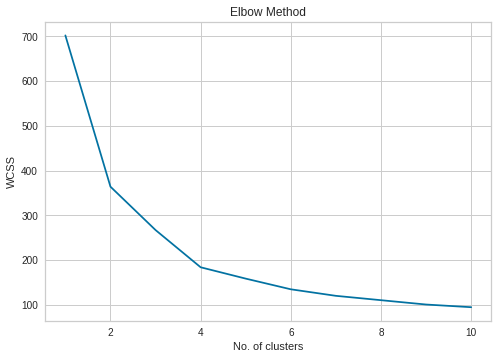

In [53]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


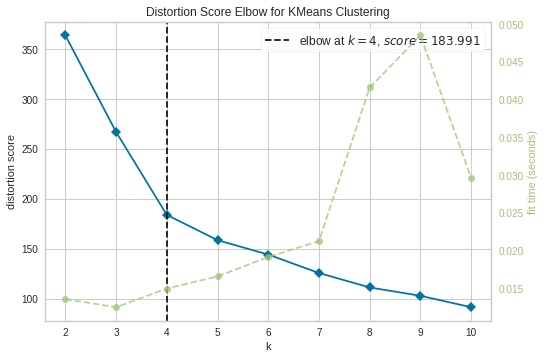

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow_method=KElbowVisualizer(KMeans(),k=10)
elbow_method.fit(X)
elbow_method.show()

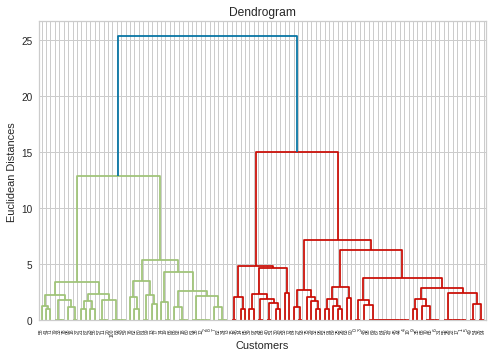

In [55]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

#ทั้ง 2 วิธีการ Elbow Method และ Hierarchical Clustering แสดงให้เห็นว่า K=4 

In [56]:
kmeans=KMeans(n_clusters=4,init="k-means++",n_init=10,tol=1e-04,random_state=42)
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=data_zoo3.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])

In [57]:
fig2=px.line_polar(polar,r="value",theta="variable",color="label",line_close=True,height=500,width=500)
fig2.show()

* เพื่อจัดกลุ่มสัตว์โดยใช้ 4 กลุ่ม

In [58]:
# สร้างตัวแบบ
clf_final=KMeans(n_clusters=4,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(n_clusters=4, random_state=42)

In [59]:
# ทำนายกลุ่มข้อมูล
data_zoo3["Clusters"]=clf_final.predict(X)

In [60]:
# Summary of Clusters  เเสดงเเค่ Top - 5
cluster_summary=pd.concat([data_zoo3[data_zoo3["Clusters"]==3].head(5),data_zoo3[data_zoo3["Clusters"]==2].head(5),data_zoo3[data_zoo3["Clusters"]==1].head(5),data_zoo3[data_zoo3["Clusters"]==0].head(5)])
cluster_summary

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,label,Clusters
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,3
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,3
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,3
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,3
13,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,2,2
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,2,2
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,2,2
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,2,2
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,2,2


In [61]:
cluster_summary.style.background_gradient(cmap='Blues').format("{:.2f}") #ควรเป็นหน่วยเดียวกัน 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,label,Clusters
2,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,3.00
7,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,3.00
8,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,3.00
12,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,3.00
13,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,3.00
0,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,0.00,0.00,1.00,2.00,2.00
1,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00,2.00
3,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,0.00,0.00,1.00,2.00,2.00
4,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00,2.00
5,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,4.00,1.00,0.00,1.00,2.00,2.00


อันนี้ของตังอิอิ

In [63]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns

In [65]:
Zoo = pd.read_csv('/content/drive/MyDrive/Project/zoo.csv')

In [66]:
cols_to_drop = ["catsize", "domestic"]
Zoo = Zoo.drop(cols_to_drop, axis=1)

# use ifelse to update values in the specified columns
Zoo['aquatic'] = np.where(Zoo['animal_name'] == 'clam', 1, Zoo['aquatic'])
Zoo['breathes'] = np.where(Zoo['animal_name'] == 'seasnake', 1, Zoo['breathes'])
Zoo['venomous'] = np.where(Zoo['animal_name'] == 'platypus', 1, Zoo['venomous'])
Zoo['legs'] = np.where(Zoo['animal_name'] == 'seal', 4, Zoo['legs'])

In [67]:
# ใช้คอลัมน์ 'class_type' เพื่อสร้างคอลัมน์ 'type'
Zoo['type'] = np.select(
    [
        Zoo['class_type'] == 1,
        Zoo['class_type'] == 2,
        Zoo['class_type'] == 3,
        Zoo['class_type'] == 4,
        Zoo['class_type'] == 5,
        Zoo['class_type'] == 6,
        Zoo['class_type'] == 7
    ],
    [
        'Mammal',
        'Bird',
        'Reptile',
        'Fish',
        'Amphibian',
        'Bug',
        'Invertebrate'
    ],
    default=''
)

In [68]:
Zoo = Zoo.assign(type = np.select(
    [Zoo.animal_name.isin(['flea', 'gnat', 'honeybee', 'housefly', 'ladybird', 'moth', 'termite', 'wasp', 'scorpion', 'slug', 'worm']),
     Zoo.animal_name.isin(['clam', 'crab', 'crayfish', 'lobster', 'octopus', 'seawasp', 'starfish'])],
    ['terrestrial_invertebrate', 'aquatic_invertebrate'], default = Zoo.type))

Zoo['class_type'] = np.select(
    [Zoo.type == 'terrestrial_invertebrate', Zoo.type == 'aquatic_invertebrate'],
    [6, 7], default = Zoo.class_type)

In [69]:
Zoo = Zoo.assign(tail = np.where(Zoo["type"]=="Fish", 0, 
                     np.where(Zoo["animal_name"]=="Aardvaark", 1, 
                              np.where(Zoo["animal_name"]=="bear", 1, 
                                       np.where(Zoo["animal_name"]=="seal", 1, 
                                                Zoo["tail"].astype(int))))))

In [70]:
Zoo = Zoo.assign(caudal_fin = np.where(Zoo['type'] == 'Fish', 1, 0))

In [71]:
Zoo = Zoo.assign(legs=np.where(Zoo["animal_name"]=="wallaby", 4,
                np.where(Zoo["animal_name"]=="sealion", 4,
                np.where(Zoo["animal_name"]=="crab", 10,
                np.where(Zoo["animal_name"]=="crayfish", 10,
                np.where(Zoo["animal_name"]=="lobster", 10,
                Zoo["legs"].astype(float))))))
                )

In [76]:
Zoo = Zoo.groupby('animal_name').apply(lambda x: x.assign(animal_name = x['animal_name'] + x.groupby('animal_name').cumcount().add(1).astype(str)) if len(x)>1 else x.assign(animal_name = x['animal_name'])).reset_index(drop=True)
Zoo['animal'] = Zoo['type'] + "_" + Zoo['animal_name']

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical columns only
Zoo_numeric = Zoo.select_dtypes(include=['int64', 'float64'])

# Scale the data
scaler = StandardScaler()
Zoo_scaled = scaler.fit_transform(Zoo_numeric)

# Perform PCA
pca = PCA()
Zoo_pca = pca.fit_transform(Zoo_scaled)

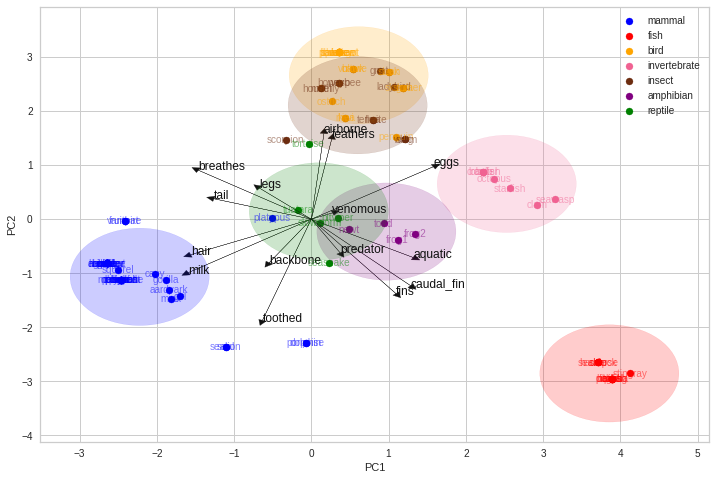

In [78]:
# Load data
zoo = Zoo
zoo["type"] = zoo["class_type"].apply(lambda x: "mammal" if x == 1 else "bird" if x == 2 else "reptile" if x == 3 else "fish" if x == 4 else "amphibian" if x == 5 else "insect" if x == 6 else "invertebrate")
zoo["animal"] = pd.factorize(zoo["animal_name"])[0]

# Separate features and target
X = zoo.drop(["animal_name", "class_type", "type", "animal"], axis=1)
y = zoo["type"]

# Scale features
X_scaled = (X - X.mean()) / X.std()

# Perform PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
type_colors = {"mammal": "blue", "bird": "orange", "reptile": "green", "fish": "red", "amphibian": "purple", "insect": "#6c2c10", "invertebrate": "#f06292"}

# Create biplot
fig, ax = plt.subplots(figsize=(12, 8))
for i, animal_type in enumerate(y.unique()):
    ax.scatter(X_pca[y == animal_type, 0], X_pca[y == animal_type, 1], label=animal_type, color=type_colors[animal_type])

for i, feature in enumerate(X.columns):
    ax.arrow(0, 0, pca.components_[0, i] * 4.15, pca.components_[1, i]* 4.10, head_width=0.1, head_length=0.1, color="k")
    ax.text(pca.components_[0, i] * 4.15, pca.components_[1, i] * 4.15, feature, color="k")

for i, animal in enumerate(zoo["animal_name"]):
    animal_type = y[i]
    ax.text(X_pca[i, 0], X_pca[i, 1], animal, ha="center", va="center", fontsize=10, color=type_colors[animal_type], alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend()

# Calculate mean PCA scores of each group
pca_df = pd.DataFrame({"PC1": X_pca[:, 0], "PC2": X_pca[:, 1], "Type": y})
mean_pca = pca_df.groupby("Type").mean()

# Plot group circles
for i, animal_type in enumerate(y.unique()):
    circle = plt.Circle((mean_pca.loc[animal_type, "PC1"], mean_pca.loc[animal_type, "PC2"]), radius=0.9, color=type_colors[animal_type], alpha=0.2)
    ax.add_patch(circle)

plt.show()

# สรุปจัดกลุ่มได้ทั้งหมด 4 กลุ่มดังนี้
* Cluster 3 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี hair,feathers,milk,airborne,breathes,venomous,legs,catsize
* Cluster 2 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี feathers,eggs,airborne,aquatic,venomous,fins,catsize
* Cluster 1 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี hair,milk,toothed,venomous,fins
* Cluster 0 = สัตว์ที่อยู่ในประเภทนี้ต้องไม่มี feathers,milk,toothed,backbone,fins,tail,catsize

# ประโยชน์ 
* จำเเนกประเภทของสัตว์เเต่ละชนิดด้วยตัวแปรต่างๆ ทำนายให้รู้ว่าลักษณะดังกล่าวคือสัตว์ประเภทไหน เพื่อง่ายต่อการเเยกประเภทของสัตว์ในสวนสัตว์
* สามารถจัดแสดงโชว์ของสัตว์ได้ โดยใช้สัตว์ประเภทเดียวกันแสดงโชว์ด้วยกัน
* ทำให้ทราบถึงลักษณะโครงสร้างของสิ่งมีชีวิตที่ต่างกันและคล้ายคลึงกัน
